In [1]:
%env WORKDIR ~/Documents/weatherpy-work/

import sys
sys.path.append('..')

from wxdata import stormevents
from wxdata.extras import st_clusters

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

env: WORKDIR=~/Documents/weatherpy-work/


In [2]:
df = stormevents.tornadoes('2011-04-25 00:00', '2011-04-29 00:00', tz='CST')
df.head()

,begin_yearmonth,begin_day,begin_time,end_yearmonth,end_day,end_time,episode_id,event_id,state,state_fips,...,end_range,end_azimuth,end_location,begin_lat,begin_lon,end_lat,end_lon,episode_narrative,event_narrative,data_source
0,201104,26,2025,201104,26,2032,49622,293875,LOUISIANA,22,...,4.0,NNE,UNION,32.3701,-92.8346,32.4328,-92.7832,A very volatile atmosphere developed during th...,Multiple trees were snapped and uprooted along...,CSV
1,201104,27,1328,201104,27,1329,50307,303012,MISSISSIPPI,28,...,2.0,N,PLEASANT RIDGE,34.5912,-88.8323,34.5944,-88.8265,A stationary front remained draped across Sout...,A weak tornado briefly touched down on Highway...,CSV
2,201104,27,1350,201104,27,1356,50307,303232,MISSISSIPPI,28,...,2.0,SSE,SEARCY TOWN,34.7709,-88.5147,34.7941,-88.4851,A stationary front remained draped across Sout...,A weak tornado briefly touched down along High...,CSV
3,201104,26,1735,201104,26,1802,50307,300685,MISSISSIPPI,28,...,0.0,SSW,COAHOMA,34.1837,-90.8902,34.3668,-90.5225,A stationary front remained draped across Sout...,A weak tornado traveled northeast out of Phill...,CSV
4,201104,27,1359,201104,27,1402,50307,303242,MISSISSIPPI,28,...,1.0,ENE,ENDVILLE,34.3202,-88.8848,34.3259,-88.8683,A stationary front remained draped across Sout...,A weak tornado touched down near Endville Road...,CSV


In [3]:
clusters = st_clusters(df, eps_km=90, eps_min=60, min_samples=30)
print('Found {} clusters'.format(len(clusters)))

Found 12 clusters


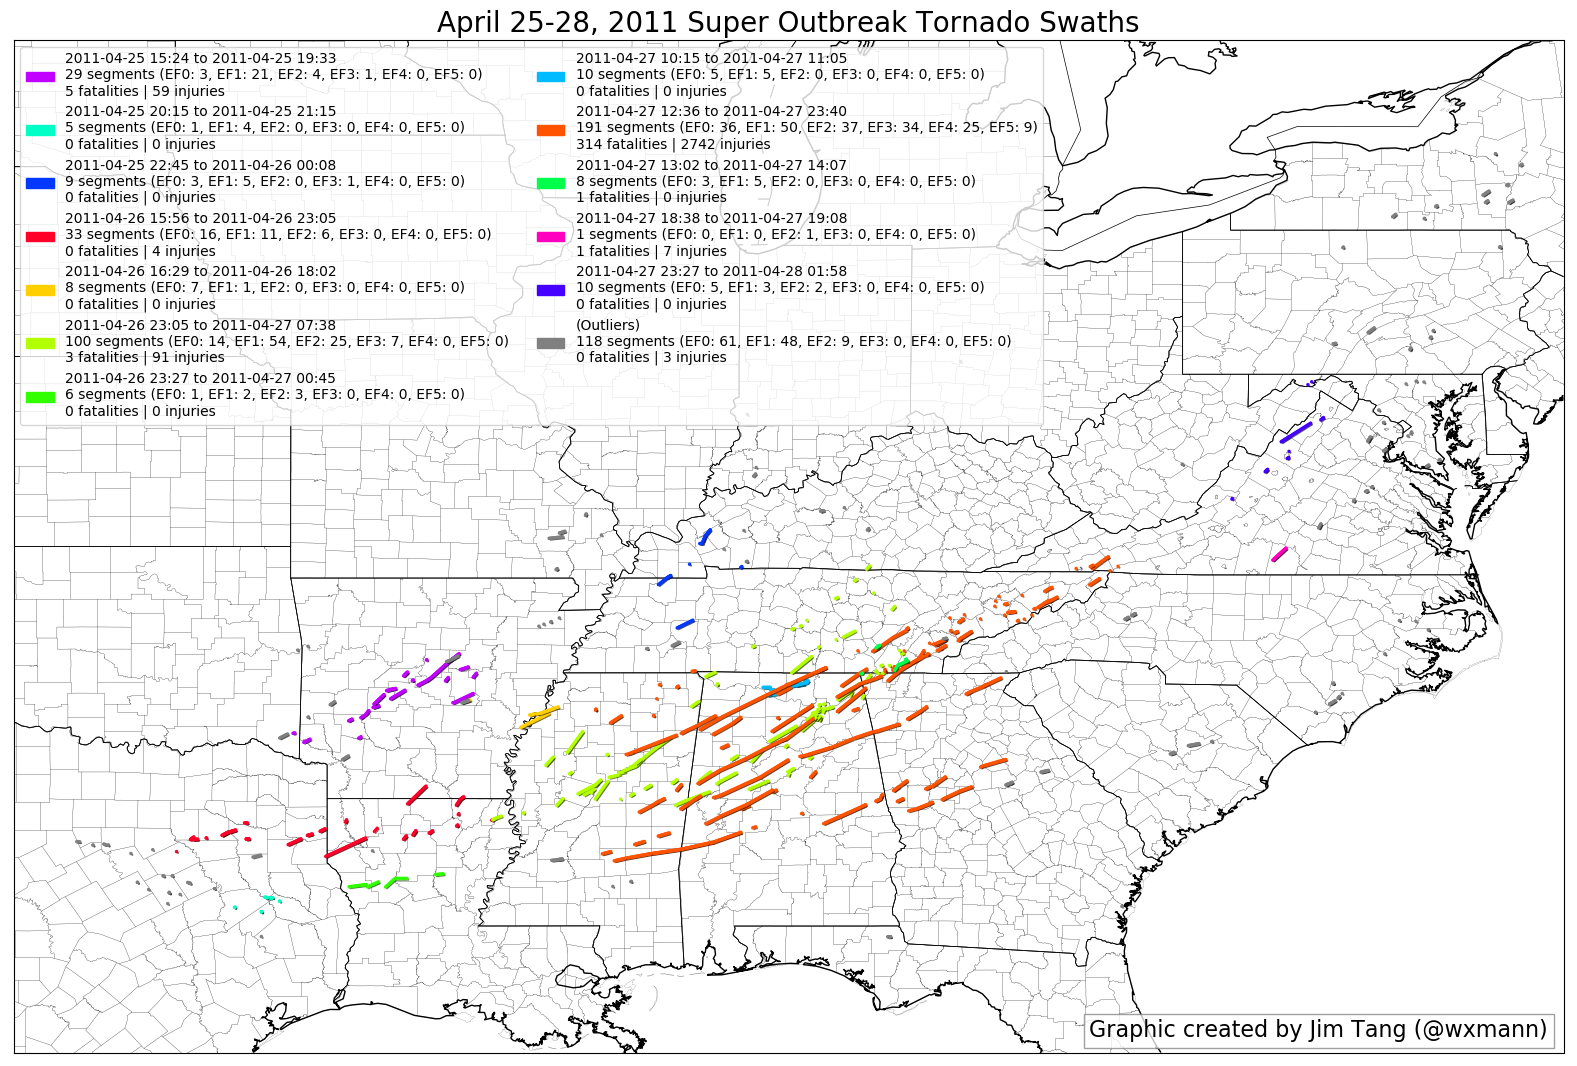

In [4]:
from wxdata.plotting import simple_basemap, sample_colors, LegendBuilder, bottom_right_textbox, plot_points
import matplotlib.patheffects as path_effects

fig = plt.figure(figsize=(20, 20), dpi=100)
bbox = (-99, -74.5, 29, 45)
basemap = simple_basemap(bbox, 'cyl', draw=('coastlines', 'countries', 'states', 'counties'))
colors = sample_colors(len(clusters), 'gist_rainbow')

legend = LegendBuilder(loc=2, ncol=2)
shadow = path_effects.withSimplePatchShadow(offset=(1, -1), alpha=0.6)

for clust in clusters.clusters:
    color = colors[clust.index]
    plot_points(clust.pts, basemap, color, markersize=1.5, path_effects=[shadow])
    legend.append(color, clust.describe_tors())

noise = clusters.noise
plot_points(noise.pts, basemap, markersize=1.5, color='gray', path_effects=[shadow])
legend.append('gray', noise.describe_tors())

legend.plot_legend()
bottom_right_textbox(fig.axes[0], 'Graphic created by Jim Tang (@wxmann)')
plt.title('April 25-28, 2011 Super Outbreak Tornado Swaths', fontsize=20)
plt.show()